In [1]:
# !pip install catboost
# !pip install pycaret

In [2]:
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import datetime as dt
from pycaret.regression import *
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import matplotlib.font_manager as fm
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams["figure.figsize"] = (8,4)
mpl.rcParams['axes.grid'] = True 
path = 'C:\\Windows\\Fonts\\\x7f\x7f\x7f\x7fBOLD.TTF'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
# plt.title('한글제목')
# plt.show()

NanumGothic


In [4]:
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

In [5]:
train.shape, test.shape

((1205, 12), (50, 10))

In [6]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [7]:
test.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치


In [8]:
train[['현본사소속재택근무자수', '중식계', '석식계']] = train[['현본사소속재택근무자수', '중식계', '석식계']].astype('int')
test['현본사소속재택근무자수'] = test['현본사소속재택근무자수'].astype('int')
train['일자'].min(), train['일자'].max(), test['일자'].min(), test['일자'].max()

('2016-02-01', '2021-01-26', '2021-01-27', '2021-04-09')

####  df  = train, test 

In [9]:
df = train.append(test)

df['일자'] = pd.to_datetime(df['일자'])
# df['년'] = df['일자'].dt.year
# df['월'] = df['일자'].dt.month
# df['일'] = df['일자'].dt.day
# df['주'] = df['일자'].dt.week
# df['요일'] = df['일자'].dt.weekday



df['출근'] = df['본사정원수']-(df['본사휴가자수']+df['본사출장자수']+df['현본사소속재택근무자수'])
df['출근비율'] = df['출근']/df['본사정원수']
df['휴가비율'] = df['본사휴가자수']/df['본사정원수']
df['출장비율'] = df['본사출장자수']/df['본사정원수']
df['야근비율'] = df['본사시간외근무명령서승인건수']/df['출근']
df['재택비율'] = df['현본사소속재택근무자수']/df['본사정원수']

df['중식특식여부'] =  np.where(df['중식메뉴'].str.contains('특식')==True, 1, 0) 
df['자기개발의날여부'] = np.where( (df['석식메뉴'].str.len()<=20) & (df['출근'] >0), 1, 0)

drop_cols = ['요일','출근','조식메뉴','본사정원수','본사휴가자수','본사출장자수','본사시간외근무명령서승인건수','현본사소속재택근무자수']
df= df.drop(drop_cols, axis=1)

In [10]:
print(df.shape)
df.head()

(1255, 12)


,일자,중식메뉴,석식메뉴,중식계,석식계,출근비율,휴가비율,출장비율,야근비율,재택비율,중식특식여부,자기개발의날여부
0,2016-02-01,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,0.923106,0.019223,0.057670,0.099125,0.0,0,0
1,2016-02-02,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,0.914264,0.019223,0.066513,0.134146,0.0,0,0
2,2016-02-03,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,0.909266,0.021530,0.069204,0.046934,0.0,0,0
3,2016-02-04,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,0.875433,0.039985,0.084583,0.155907,0.0,0,0
4,2016-02-05,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,0.823529,0.106882,0.069589,0.015873,0.0,0,0


In [11]:
before_dataset = pd.to_datetime(df.loc[0,'일자']).min() - dt.timedelta(days=1)
after_dataset = pd.to_datetime(df.loc[0,'일자']).max() + dt.timedelta(days=1)
before_dataset = before_dataset.strftime("%Y-%m-%d")
after_dataset = after_dataset.strftime("%Y-%m-%d")
before_dataset, after_dataset

('2016-01-31', '2021-01-28')

## 공휴일 공통함수
<pre>
서비스 URL: http://apis.data.go.kr/B090041/openapi/service/SpcdeInfoService/{서비스오퍼레이션}

서비스	종류		오퍼레이션명
-----	------	--------------
국경일 정보조회	getHoliDeInfo	01: 국경일 (ex: 어린이날, 광복절, 개천절)
공휴일 정보조회	getRestDeInfo
기념일 정보조회	getAnniversaryInfo	02: 기념일 (ex: 의병의 날, 정보보호의 날, 4/19 혁명 기념일)
24절기 정보조회	get24DivisionsInfo	03: 24절기 (ex: 청명, 경칩, 하지)
잡절   정보조회	getSundryDayInfo	04: 잡절 (ex: 단오, 한식)
</pre>

In [12]:
## 공휴일

import requests
from urllib import parse
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime

def get_holiday(syear=2016, eyear=2021 ) :
    api_key_utf8 = "pLlZwGigTf4euiGFUdQ7ktJfpWwXA5CiHJPPtfQgwx45SHhTgIiEjF4k72HaTqHiet8qB%2F0JYw1XYOUH%2FKlRSw%3D%3D"
    api_key_decode = parse.unquote(api_key_utf8)
    operation_name_list =['getHoliDeInfo'] #,'getAnniversaryInfo','get24DivisionsInfo','getSundryDayInfo']
    
    item_list = []
    for holiday_type in operation_name_list:
        url = "http://apis.data.go.kr/B090041/openapi/service/SpcdeInfoService/" + holiday_type
        for year in np.arange(syear, eyear+1) : 
            params = {
                "ServiceKey": api_key_decode,
                "solYear": year,
                "numOfRows": 100
            }

            response = requests.get(url, params=params)
            xml = BeautifulSoup(response.text, "lxml")
            items = xml.find('items')
            item_dict = {}
            for item in items:
                item_dict = {
                    "날짜": datetime.strptime(item.find("locdate").text.strip(), '%Y%m%d'),
                    "휴일여부": item.find("isholiday").text.strip(),
                    "종류" : item.find("datekind").text.strip(),
                    "이름":  item.find("datename").text.strip()
                }
                item_list.append(item_dict)
            res_df = pd.DataFrame(item_list)
            res_df = res_df.fillna('')
            res_df['휴일여부'].replace('Y', 1, inplace=True)
            res_df['휴일여부'].replace('N', 0, inplace=True)
            res_df['휴일여부'].fillna(0)
            res_df['휴일여부'] = res_df['휴일여부'].astype('int')
            # res_df['휴일여부'] = res_df['일자'].apply(lambda x:  1 if x in list else 0)
    return res_df


#### min date ~ max date 날짜 전체 

In [13]:
start_date = pd.to_datetime(df['일자'].min())  #.year
end_date = pd.to_datetime(df['일자'].max())   #.year
dates = pd.date_range(start_date,end_date,freq='D') 
date_df = pd.DataFrame({'날짜':dates})
date_df.head()

,날짜
0,2016-02-01
1,2016-02-02
2,2016-02-03
3,2016-02-04
4,2016-02-05


#### min date ~ max date 날짜 사이의 공휴일

In [14]:
start_year = pd.to_datetime(before_dataset).year  #df['일자'].min()).year
end_year = pd.to_datetime(after_dataset).year   #df['일자'].max()).year
holiday_df = get_holiday(start_year,end_year)
holiday_df.head()

,날짜,휴일여부,종류,이름
0,2016-01-01,1,01,신정
1,2016-02-07,1,01,설날
2,2016-02-08,1,01,설날
3,2016-02-09,1,01,설날
4,2016-02-10,1,01,대체공휴일


#### 달력만들기 : 날짜 전체 , 공휴일 merge, 년, 월, 일, 주, 요일 피쳐 추가

In [15]:
cal_df = pd.merge(date_df, holiday_df[holiday_df['종류']=='01'] , on='날짜', how='left')
cal_df = cal_df[['날짜','휴일여부']]  
cal_df.fillna(0, inplace=True)
cal_df['휴일여부'] = cal_df['휴일여부'].astype('int')
cal_df.head()

,날짜,휴일여부
0,2016-02-01,0
1,2016-02-02,0
2,2016-02-03,0
3,2016-02-04,0
4,2016-02-05,0


In [16]:
cal_df['휴일여부'].fillna(0, inplace=True)
cal_df['휴일여부'] = cal_df['휴일여부'].astype('int')
cal_df = cal_df.fillna('')
cal_df['년'] = cal_df['날짜'].dt.year
cal_df['월'] = cal_df['날짜'].dt.month
cal_df['일'] = cal_df['날짜'].dt.day
cal_df['주'] = cal_df['날짜'].dt.week
cal_df['요일'] = cal_df['날짜'].dt.weekday
cal_df.loc[(cal_df['요일']==5) | (cal_df['요일']==6), '휴일여부'] = 1
cal_df['코로나발생'] = cal_df['년'].apply(lambda x:  1 if x>=2020 else 0)
cal_df.head()

,날짜,휴일여부,년,월,일,주,요일,코로나발생
0,2016-02-01,0,2016,2,1,5,0,0
1,2016-02-02,0,2016,2,2,5,1,0
2,2016-02-03,0,2016,2,3,5,2,0
3,2016-02-04,0,2016,2,4,5,3,0
4,2016-02-05,0,2016,2,5,5,4,0


In [17]:
cal_df.isna().sum()

날짜       0
휴일여부     0
년        0
월        0
일        0
주        0
요일       0
코로나발생    0
dtype: int64

In [18]:
before_dataset_holiday = 0
if before_dataset in cal_df['날짜']:
    before_dataset_holiday = 1
    
after_dataset_holiday = 0
if after_dataset in cal_df['날짜']:
    after_dataset_holiday = 1
before_dataset_holiday, after_dataset_holiday

(0, 0)

In [19]:
# g = 휴일.groupby('날짜')  #  GROUP BY A
# ss = g.filter(lambda x: len(x) > 1)  #  HAVING COUNT(*) > 1
# ss.head()

# cal_df['공휴일'] = cal_df['일자'].apply(lambda x:  1 if x in list else 0)

#### 달력(기준) , 식수정보 merge

In [20]:
cdf = pd.merge(cal_df, df,
             how='left', # left, rigth, inner (default), outer
             left_on='날짜', right_on='일자')
cdf.head()

,날짜,휴일여부,년,월,일,주,요일,코로나발생,일자,중식메뉴,석식메뉴,중식계,석식계,출근비율,휴가비율,출장비율,야근비율,재택비율,중식특식여부,자기개발의날여부
0,2016-02-01,0,2016,2,1,5,0,0,2016-02-01,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,0.923106,0.019223,0.057670,0.099125,0.0,0.0,0.0
1,2016-02-02,0,2016,2,2,5,1,0,2016-02-02,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,0.914264,0.019223,0.066513,0.134146,0.0,0.0,0.0
2,2016-02-03,0,2016,2,3,5,2,0,2016-02-03,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,0.909266,0.021530,0.069204,0.046934,0.0,0.0,0.0
3,2016-02-04,0,2016,2,4,5,3,0,2016-02-04,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,0.875433,0.039985,0.084583,0.155907,0.0,0.0,0.0
4,2016-02-05,0,2016,2,5,5,4,0,2016-02-05,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,0.823529,0.106882,0.069589,0.015873,0.0,0.0,0.0


In [21]:
menu_df = cdf[['중식메뉴','석식메뉴']].copy()
drop_cols = ['일자','중식메뉴','석식메뉴']
cdf= cdf.drop(drop_cols, axis=1)
cdf.head()

,날짜,휴일여부,년,월,일,주,요일,코로나발생,중식계,석식계,출근비율,휴가비율,출장비율,야근비율,재택비율,중식특식여부,자기개발의날여부
0,2016-02-01,0,2016,2,1,5,0,0,1039.0,331.0,0.923106,0.019223,0.057670,0.099125,0.0,0.0,0.0
1,2016-02-02,0,2016,2,2,5,1,0,867.0,560.0,0.914264,0.019223,0.066513,0.134146,0.0,0.0,0.0
2,2016-02-03,0,2016,2,3,5,2,0,1017.0,573.0,0.909266,0.021530,0.069204,0.046934,0.0,0.0,0.0
3,2016-02-04,0,2016,2,4,5,3,0,978.0,525.0,0.875433,0.039985,0.084583,0.155907,0.0,0.0,0.0
4,2016-02-05,0,2016,2,5,5,4,0,925.0,330.0,0.823529,0.106882,0.069589,0.015873,0.0,0.0,0.0


In [22]:
cdf['전일휴일'] = cdf['휴일여부'].shift(1)
cdf['다음날휴일'] = cdf['휴일여부'].shift(-1)

In [23]:
cdf.head()

,날짜,휴일여부,년,월,일,주,요일,코로나발생,중식계,석식계,출근비율,휴가비율,출장비율,야근비율,재택비율,중식특식여부,자기개발의날여부,전일휴일,다음날휴일
0,2016-02-01,0,2016,2,1,5,0,0,1039.0,331.0,0.923106,0.019223,0.057670,0.099125,0.0,0.0,0.0,NaN,0.0
1,2016-02-02,0,2016,2,2,5,1,0,867.0,560.0,0.914264,0.019223,0.066513,0.134146,0.0,0.0,0.0,0.0,0.0
2,2016-02-03,0,2016,2,3,5,2,0,1017.0,573.0,0.909266,0.021530,0.069204,0.046934,0.0,0.0,0.0,0.0,0.0
3,2016-02-04,0,2016,2,4,5,3,0,978.0,525.0,0.875433,0.039985,0.084583,0.155907,0.0,0.0,0.0,0.0,0.0
4,2016-02-05,0,2016,2,5,5,4,0,925.0,330.0,0.823529,0.106882,0.069589,0.015873,0.0,0.0,0.0,0.0,1.0


In [24]:
cdf.at[0,'전일휴일'] = before_dataset_holiday
cdf.at[cdf.shape[0]-1,'다음날휴일'] =  after_dataset_holiday

In [25]:
cdf.isna().sum()

날짜            0
휴일여부          0
년             0
월             0
일             0
주             0
요일            0
코로나발생         0
중식계         691
석식계         691
출근비율        641
휴가비율        641
출장비율        641
야근비율        641
재택비율        641
중식특식여부      641
자기개발의날여부    641
전일휴일          0
다음날휴일         0
dtype: int64

In [26]:
cdf.fillna(0, inplace=True)
cdf[['중식특식여부','자기개발의날여부','전일휴일','다음날휴일']] = cdf[['중식특식여부','자기개발의날여부','전일휴일','다음날휴일']].astype('int')

In [27]:
cdf.isna().sum()

날짜          0
휴일여부        0
년           0
월           0
일           0
주           0
요일          0
코로나발생       0
중식계         0
석식계         0
출근비율        0
휴가비율        0
출장비율        0
야근비율        0
재택비율        0
중식특식여부      0
자기개발의날여부    0
전일휴일        0
다음날휴일       0
dtype: int64

In [28]:
# cdf = cdf.set_index('날짜')
cdf.head()

,날짜,휴일여부,년,월,일,주,요일,코로나발생,중식계,석식계,출근비율,휴가비율,출장비율,야근비율,재택비율,중식특식여부,자기개발의날여부,전일휴일,다음날휴일
0,2016-02-01,0,2016,2,1,5,0,0,1039.0,331.0,0.923106,0.019223,0.057670,0.099125,0.0,0,0,0,0
1,2016-02-02,0,2016,2,2,5,1,0,867.0,560.0,0.914264,0.019223,0.066513,0.134146,0.0,0,0,0,0
2,2016-02-03,0,2016,2,3,5,2,0,1017.0,573.0,0.909266,0.021530,0.069204,0.046934,0.0,0,0,0,0
3,2016-02-04,0,2016,2,4,5,3,0,978.0,525.0,0.875433,0.039985,0.084583,0.155907,0.0,0,0,0,0
4,2016-02-05,0,2016,2,5,5,4,0,925.0,330.0,0.823529,0.106882,0.069589,0.015873,0.0,0,0,0,1


Index(['중식계', '석식계', '출근비율', '출장비율', '야근비율', '휴가비율', '재택비율', '자기개발의날여부',
       '중식특식여부', '일', '주', '월', '전일휴일', '코로나발생', '년', '다음날휴일', '요일', '휴일여부'],
      dtype='object')


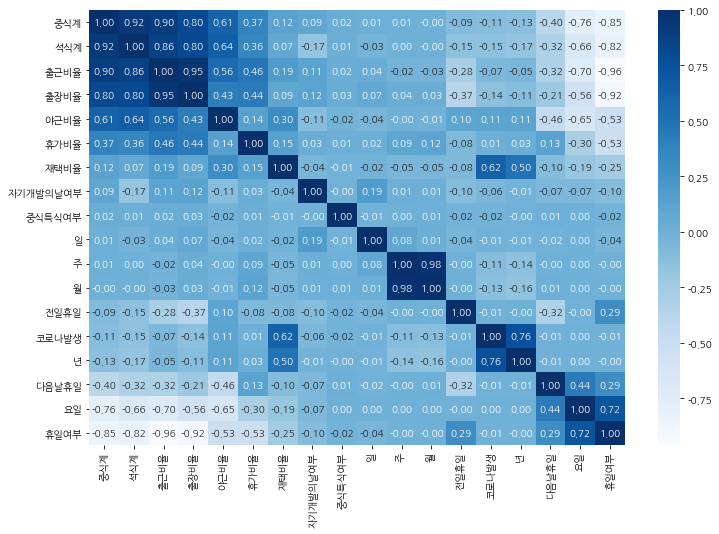

In [29]:
중식계_corr_feature  = cdf.corr().nlargest(20, '중식계').index
print(중식계_corr_feature)
plt.figure(figsize=(12,8))
sns.heatmap(cdf[중식계_corr_feature].corr(), annot=True, cmap='Blues', fmt='0.2f')
plt.show()

In [30]:
print(cdf.corrwith(cdf["중식계"]).sort_values(ascending=False)[:5])
print(cdf.corrwith(cdf["중식계"]).sort_values(ascending=False)[-5:])

중식계     1.000000
석식계     0.916118
출근비율    0.898021
출장비율    0.802269
야근비율    0.612867
dtype: float64
코로나발생   -0.110014
년       -0.132369
다음날휴일   -0.400765
요일      -0.759452
휴일여부    -0.849490
dtype: float64


In [31]:
print(cdf.corrwith(cdf["석식계"]).sort_values(ascending=False)[:5])
print(cdf.corrwith(cdf["석식계"]).sort_values(ascending=False)[-5:])

석식계     1.000000
중식계     0.916118
출근비율    0.863069
출장비율    0.801486
야근비율    0.643595
dtype: float64
자기개발의날여부   -0.171378
년          -0.171962
다음날휴일      -0.323073
요일         -0.663788
휴일여부       -0.815750
dtype: float64


In [32]:
cdf.head(20)

,날짜,휴일여부,년,월,일,주,요일,코로나발생,중식계,석식계,출근비율,휴가비율,출장비율,야근비율,재택비율,중식특식여부,자기개발의날여부,전일휴일,다음날휴일
0,2016-02-01,0,2016,2,1,5,0,0,1039.0,331.0,0.923106,0.019223,0.057670,0.099125,0.0,0,0,0,0
1,2016-02-02,0,2016,2,2,5,1,0,867.0,560.0,0.914264,0.019223,0.066513,0.134146,0.0,0,0,0,0
2,2016-02-03,0,2016,2,3,5,2,0,1017.0,573.0,0.909266,0.021530,0.069204,0.046934,0.0,0,0,0,0
3,2016-02-04,0,2016,2,4,5,3,0,978.0,525.0,0.875433,0.039985,0.084583,0.155907,0.0,0,0,0,0
4,2016-02-05,0,2016,2,5,5,4,0,925.0,330.0,0.823529,0.106882,0.069589,0.015873,0.0,0,0,0,1
5,2016-02-06,1,2016,2,6,5,5,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0,0,0,1
6,2016-02-07,1,2016,2,7,5,6,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0,0,1,1
7,2016-02-08,1,2016,2,8,6,0,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0,0,1,1
8,2016-02-09,1,2016,2,9,6,1,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0,0,1,1
9,2016-02-10,1,2016,2,10,6,2,0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0,0,1,0


### 카레고리화

In [33]:
# cdf.loc[:, ['월', '일', '주', '요일']] = cdf.loc[:, ['월', '일', '주', '요일']].astype('str')
# cdf.info()


In [34]:
# cdf = pd.get_dummies(cdf)
# cdf.shape

## 1. 달력형 train 원본 test

In [35]:
# ((1205, 12), (50, 10))
train['일자'].min(), train['일자'].max(), test['일자'].min(), test['일자'].max()

('2016-02-01', '2021-01-26', '2021-01-27', '2021-04-09')

In [36]:
cdf_train = cdf[cdf['날짜'] <= train['일자'].max()]
cdf_test = cdf[cdf['날짜'] > train['일자'].max()]
cdf_test  = cdf_test[cdf_test['날짜'].isin(test['일자'].values)]
# cdf_test = cdf_test.drop(['중식계','석식계'], axis=1)
print(cdf_train.shape, cdf_test.shape)
# print(cdf_train['날짜'].min(), cdf_train['날짜'].max(), cdf_test['날짜'].min(), cdf_test['날짜'].max())

(1823, 19) (50, 19)


In [37]:
cdf_train = cdf_train.drop('날짜', axis=1)
cdf_test = cdf_test.drop('날짜', axis=1)

# 예측 모델

In [38]:
submission_esb = pd.read_csv('sample_submission.csv')
print(submission_esb.shape, cdf_test.shape)
submission_esb.head()

FileNotFoundError: [Errno 2] No such file or directory: 'sample_submission.csv'

### pycaret
* ref : https://pycaret.readthedocs.io/en/latest/api/classification.html

### 중식계 예측

In [ ]:
reg = setup(data=cdf_train,
            target='중식계',
            numeric_imputation = 'mean',
            normalize = True,
            data_split_shuffle= False,
            silent= True,
           normalize_method='robust'  #minmax
           )

In [ ]:
best_5_l = compare_models(sort='MAE', n_select=5)

In [ ]:
# 앙상블 모델
blended_l = blend_models(estimator_list= best_5_l, fold=5, optimize='MAE')
pred_holdout = predict_model(blended_l)
final_model_l = finalize_model(blended_l)
pred_esb_l = predict_model(final_model_l, cdf_test)
submission_esb['중식계'] = pred_esb_l['Label']
# submission_esb

In [ ]:
reg = setup(data=cdf_train,
            target='석식계',
            numeric_imputation = 'mean',
            normalize = True,
            data_split_shuffle= False,
            silent= True,
           normalize_method='robust'  #minmax
           )

In [ ]:
best_5_l = compare_models(sort='MAE', n_select=5)

In [ ]:
# 앙상블 모델
blended_l = blend_models(estimator_list= best_5_l, fold=5, optimize='MAE')
pred_holdout = predict_model(blended_l)
final_model_l = finalize_model(blended_l)
pred_esb_l = predict_model(final_model_l, cdf_test)


In [ ]:
pred_esb_l['Label'].head()
submission_esb['석식계'] = pred_esb_l['Label']
submission_esb

In [ ]:
print(submission_esb.shape)
submission_esb.head()
submission_esb.to_csv("sub_submission.csv", index=False)

### train 7:3 검증용

In [ ]:
# from sklearn.model_selection import train_test_split
# cdf_train, cdf_test = train_test_split(cdf_train,  test_size=70)
# cdf_test = cdf_test[cdf_test['중식계']>0]
# cdf_train.shape, cdf_test.shape

In [ ]:
# val = pd.DataFrame( {"pred":pred_esb_l['Label'] , "ans":cdf_test['중식계']})
# val["diff"] = val['pred'] - val['ans']
# val.head(10)
# # print(val['diff'].mean())

In [ ]:
밑으로 안해도 됨...........................................................................................

## 3. 달력형으로 변환 전 train test csv 원본 형태

In [ ]:
cdf_train = cdf[cdf['날짜'].isin(train['일자'].values)]
cdf_test  = cdf[cdf['날짜'].isin(test['일자'].values)]
print(cdf_train.shape, cdf_test.shape)
# print(cdf_train['날짜'].min(), cdf_train['날짜'].max(), cdf_test['날짜'].min(), cdf_test['날짜'].max())

In [ ]:
cdf_train.head()

In [ ]:
cdf_train = cdf_train.drop('날짜', axis=1)
cdf_test = cdf_test.drop('날짜', axis=1)

In [ ]:
reg = setup(data=cdf_train,
            target='중식계',
            numeric_imputation = 'mean',
            normalize = True,
            data_split_shuffle= False,
            silent= True)

In [ ]:
best_5_l = compare_models(sort='MAE', n_select=5)

In [ ]:
# 앙상블 모델
blended_l = blend_models(estimator_list= best_5_l, fold=5, optimize='MAE')
pred_holdout = predict_model(blended_l)
final_model_l = finalize_model(blended_l)
pred_esb_l = predict_model(final_model_l, cdf_test)
# submission_esb['중식계'] = pred_esb_l['Label']
# submission_esb

In [ ]:
pred_esb_l['Label'][:5]

In [ ]:
dfdfd

### 달력 머지 시 생성된 잉여일 제외

In [ ]:
idx = cdf[cdf['출근비율'] == 0].index
cdf = cdf.drop(idx, axis=0)
cdf.shape

In [ ]:
중식계_corr_feature  = cdf.corr().nlargest(20, '중식계').index
print(중식계_corr_feature)
plt.figure(figsize=(12,8))
sns.heatmap(cdf[중식계_corr_feature].corr(), annot=True, cmap='Blues', fmt='0.2f')
plt.show()

In [ ]:
print(cdf.corrwith(cdf["중식계"]).sort_values(ascending=False)[:5])
print(cdf.corrwith(cdf["중식계"]).sort_values(ascending=False)[-5:])

In [ ]:
print(cdf.corrwith(cdf["석식계"]).sort_values(ascending=False)[:5])
print(cdf.corrwith(cdf["석식계"]).sort_values(ascending=False)[-5:])

In [ ]:
reg = setup(data=cdf,
            target='중식계',
            numeric_imputation = 'mean',
            normalize = True,
            silent= True)

In [ ]:
best_5_l = compare_models(sort='MAE', n_select=5)

In [ ]:
# 앙상블 모델
blended_l = blend_models(estimator_list= best_5_l, fold=5, optimize='MAE')
pred_holdout = predict_model(blended_l)
final_model_l = finalize_model(blended_l)
pred_esb_l = predict_model(final_model_l, cdf)
# submission_esb['중식계'] = pred_esb_l['Label']
# submission_esb

In [ ]:
pred_esb_l['Label'][:5]

In [ ]:
# submission_esb.to_csv('submission.csv', index = False)

In [ ]:
submission_esb['중식계'] = pred_esb_l['Label']

### 변수 간 관계 시각화

In [ ]:
# 일-석식계 간 관계
plt.figure(figsize=(12,6))
sns.boxplot(dd['일'], dd['석식계'])

In [ ]:
#주-석식계 간 관계
plt.figure(figsize=(20,6))
sns.boxplot(dd['주'], dd['석식계'])

In [ ]:
#월-석식계 간 관계
plt.figure(figsize=(12,6))
sns.boxplot(dd['월'], dd['석식계'])

In [ ]:
#년도-석식계 간 관계
plt.figure(figsize=(12,6))
sns.boxplot(dd['년'], dd['석식계'])

In [ ]:
ㄹㅇㄴ

## 메뉴 워드벡터

In [ ]:
import re 
text = ' 쌀밥 /잡곡밥 (쌀,현미흑미:국내산) 오징어찌개  쇠불고기 쇠고기:호주산) 계란찜  청포묵무침  요구르트  포기김치 (배추,고추가루:국내산) '
text = re.sub(r'/^\s+|\s+$/g', '', text.strip())#앞뒤 공백 제거
text = text.replace(r' /','/')  #앞뒤 공백 제거
text = text.replace(r'/ ','/')  #앞뒤 공백 제거
  
list = text.split()
relist = []
for item in list:
    item = re.sub(r'\([^)]*\)', '', item.strip())  #(s) 제거
    item = re.sub(r'[^)]*\)', '', item.strip())    #s) 제거
    item = re.sub(r'\([^)]*', '', item.strip())    #(s 제거
    item = re.sub(' +', ' ', item.strip())       #공백,탭 제거
    if len(item) > 0:
        relist.append(item)
print(relist)

In [ ]:
sequence = []
def reg_exclude_(text):
    text = re.sub(r'/^\s+|\s+$/g', '', text.strip())#앞뒤 공백 제거
    text = text.replace(r' /','/')  #앞뒤 공백 제거
    text = text.replace(r'/ ','/')  #앞뒤 공백 제거
    
    list = text.split()
    relist = []
    for item in list:
        item = re.sub(r'\([^)]*\)', '', item.strip())  #(s) 제거
        item = re.sub(r'[^)]*\)', '', item.strip())    #s) 제거
        item = re.sub(r'\([^)]*', '', item.strip())    #(s 제거
        item = re.sub(' +', ' ', item.strip())       #공백,탭 제거
        if len(item) > 0:
            relist.append(item)
    sequence.append(relist)
       #['쌀밥/잡곡밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요구르트', '포기김치']
#     return ','.join(relist)
#     return relist
# train['중식메뉴2'] = train['중식메뉴'].apply(lambda x: reg_exclude_(x))
train['중식메뉴'].apply(lambda x: reg_exclude_(x))
print(sequence[10:20])

In [ ]:
#  train[['중식메뉴','중식메뉴2']].head()

In [ ]:
# 리스트의 리스트 또는 행렬 또는 뒤에서 배울 개념인 2D 텐서
a,b,c,d,e = zip(*sequence)
e

In [ ]:
#[['bab', 'soup', 'kimchi', 'menu1', 'menu2', 'menu3', 'menu4']]
menu = pd.DataFrame(train['중식메뉴2'].str.split().tolist(), columns=["m1","m2","m3","m4","m5","m6","m7","m8"])
print(menu.shape)
menu.iloc[15:50]


In [ ]:

if menu["m1"].startswith("쌀밥"):
    menu["mm"] = menu["m1"].apply(lambda x: "쌀밥" if x == 1 else )
print(menu['mm']) 

In [ ]:
menu.to_csv("menu.csv")

In [ ]:
menu["m7"].value_counts()

## NLP
* 2021.06.12 기준
* 메뉴의 종류를 원-핫 인코딩으로 분류시켜서 학습시키니 성능 상승
* '주' 및 '월' 데이터를 추가해서 연초 연말 월초 월말 알아서 학습 유도

In [ ]:
 train['중식메뉴']

#### 메뉴 임베딩

In [ ]:
def get_food_embedding(x):
    x_ = []
    x = x.split(' ')
    for i in x:
        if '(' in i and ':' in i and ')' in i:
            continue
        if '/' in i:
            x_.extend(i.split('/'))
        else:
            x_.append(i)
    x_ = list(set(x_))
    x_.remove('')
    return x_

train['중식메뉴_split'] = train['중식메뉴'].apply(lambda x: get_food_embedding(x))
train['석식메뉴_split'] = train['석식메뉴'].apply(lambda x: get_food_embedding(x))

In [ ]:
test['중식메뉴_split'] = test['중식메뉴'].apply(lambda x: get_food_embedding(x))
test['석식메뉴_split'] = test['석식메뉴'].apply(lambda x: get_food_embedding(x))

In [ ]:
train['중식메뉴_split'][0]

In [ ]:
train.shape, test.shape

In [ ]:
lunch_lst = []
lunch_count = []
pref = 0
for i in tqdm(range(train.shape[0])):
    try:
        if train['중식계'][i] >= 880:
            pref = 1
        else:
            pref = 0

        lunch_lst.append(train['중식메뉴_split'][i])
        lunch_count.append(pref)
    except:
        pass
# for i in range(len(lunch_lst)):
  # lunch_lst[i] = lunch_lst[i].replace(',', ' ')
print('done')

In [ ]:
dinner_lst = []
dinner_count = []
pref_d = 0
for i in tqdm(range(train.shape[0])):
    try:
        if train['석식계'][i] > 476:
            pref_d = 1
        else:
            pref_d = 0

        dinner_lst.append(train['석식메뉴_split'][i])
        dinner_count.append(pref_d)
    except:
        pass
# for i in range(len(dinner_lst)):
#   dinner_lst[i] = dinner_lst[i].replace(',', ' ')
print('done')

In [ ]:
lunch_lst_test = []
lunch_count_test = []
for i in tqdm(range(test.shape[0])):
    try:
        lunch_lst_test.append(test['중식메뉴_split'][i])
        lunch_count_test.append(0)
    except:
        pass
    # for i in range(len(lunch_lst_test)):
#   lunch_lst_test[i] = lunch_lst_test[i].replace(',', ' ')
print('done')

In [ ]:
dinner_lst_test = []
dinner_count_test = []
for i in tqdm(range(test.shape[0])):
    try:
        dinner_lst_test.append(test['석식메뉴_split'][i])
        dinner_count_test.append(0)
    except:
        pass
# for i in range(len(dinner_lst_test)):
#   dinner_lst_test[i] = dinner_lst_test[i].replace(',', ' ')
print('done')

In [ ]:
lunch_df = pd.DataFrame({'중식메뉴':lunch_lst})
dinner_df = pd.DataFrame({'석식메뉴':dinner_lst})
lunch_df_t = pd.DataFrame({'중식메뉴':lunch_lst_test})
dinner_df_t = pd.DataFrame({'석식메뉴':dinner_lst_test})

In [ ]:
train.info()

In [ ]:
train[['중식메뉴','중식메뉴_split']].head()

In [ ]:
temp = []
for i, rows in enumerate(train['중식메뉴_split']):
    res = [i.split(', ')[0] for i in rows]
    for i in res:
        temp.append(i)

In [ ]:
menu = pd.DataFrame({"메뉴":temp})

In [ ]:
menu.head()

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

text = " ".join(menu['메뉴'])
wordcloud = WordCloud(max_font_size=100, font_path='C:\\Windows\\Fonts\\\x7f\x7f\x7f\x7fBOLD.TTF').generate(text)

fig = plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In [ ]:
menu[menu['메뉴'].str.contains("밥")].value_counts()

In [ ]:
menu[menu['메뉴'].str.contains("국")].value_counts()

In [ ]:
menu['메뉴'].str[-1:].value_counts()

In [ ]:
# !pip install wordcloud 

In [ ]:
menu["메뉴"].values

In [ ]:
lunch_df.iloc[0][0][0]

In [ ]:
menu[menu['메뉴'] == lunch_df.iloc[0][0][0]]

#### 모든 메뉴의 분류

In [ ]:
# menu = pd.read_csv('menu.csv', encoding='cp949')
food = list(menu['메뉴'])
result_lunch = []
result_dinner = []
for k in range(len(lunch_df)):
    trigger = np.zeros(34, dtype='int')
    for i in range(len(lunch_df.iloc[k][0])):
        if lunch_df.iloc[k][0][i] in food:
            trigger += np.array(menu[menu['메뉴'] == lunch_df.iloc[k][0][i]].iloc[0][1:-1], dtype='int')
    trigger = trigger / trigger.sum()
    result_lunch.append(trigger)

for k in range(len(dinner_df)):
    trigger = np.zeros(34, dtype='int')
    for i in range(len(dinner_df.iloc[k][0])):
        if dinner_df.iloc[k][0][i] in food:
            trigger += np.array(menu[menu['메뉴'] == dinner_df.iloc[k][0][i]].iloc[0][1:-1], dtype='int')
    trigger = trigger / trigger.sum()
    result_dinner.append(trigger)

result_lunch_t = []
result_dinner_t = []
for k in range(len(lunch_df_t)):
    trigger = np.zeros(34, dtype='int')
    for i in range(len(lunch_df_t.iloc[k][0])):
        if lunch_df_t.iloc[k][0][i] in food:
            trigger += np.array(menu[menu['메뉴'] == lunch_df_t.iloc[k][0][i]].iloc[0][1:-1], dtype='int')
    trigger = trigger / trigger.sum()
    result_lunch_t.append(trigger)

for k in range(len(dinner_df_t)):
    trigger = np.zeros(34, dtype='int')
    for i in range(len(dinner_df_t.iloc[k][0])):
        if dinner_df_t.iloc[k][0][i] in food:
            trigger += np.array(menu[menu['메뉴'] == dinner_df_t.iloc[k][0][i]].iloc[0][1:-1], dtype='int')
    trigger = trigger / trigger.sum()
    result_dinner_t.append(trigger)
    
    

## Feature Engineering
* 문화의날

## 강수량 및 기온 Feature Generating00
* 외부 데이터(기상청) 사용
* 기온 및 강수량에 따라 중식계 영향을 미칠 것으로 예상
* 본거지가 진주가 아닌 사원들이 많아 기숙사 생활 인원이 많음
* 따라서 강수량 및 기온은 크게 영향 미치지 않을 것으로 추정

## 공휴일 전후 데이터 추가
* 테스트 데이터에 설날 연휴, 어린이날 존재
* 연휴 전날 1로 인코딩 나머지 0

In [ ]:
# # 원핫인코딩
# train = pd.get_dummies(train, columns=['공휴일전후'])
# test = pd.get_dummies(test, columns=['공휴일전후'])

In [ ]:
# test['공휴일전후_0'][20] =1
# test['공휴일전후_1'][20] = 0

# Train Data Set & Test Data Set
* 데이터 지정
* 중식은 주52시간 탄련근무제에 영향 안받음
* 석식은 591번째 데이터 이후 (2018.07.01) 이후 부터 정의
* 메뉴 데이터 포함


In [ ]:
 -----------------------------<Full DATA>-----------------------------------

train_lunch = train[['요일','공휴일전후_0','휴가비율','출장비율','재택비율', '공휴일전후_2', '공휴일전후_1','출근', '본사출장자수','현본사소속재택근무자수', '본사휴가자수','일', '주', '월', '년', '중식계']]
test_lunch = test[['요일','공휴일전후_0','휴가비율','출장비율','재택비율', '공휴일전후_2', '공휴일전후_1','출근', '본사출장자수','현본사소속재택근무자수', '본사휴가자수','일', '주', '월', '년']]

train_dinner = train[['요일','공휴일전후_0','휴가비율','출장비율','재택비율', '공휴일전후_2', '공휴일전후_1','출근', '본사휴가자수','현본사소속재택근무자수', '본사시간외근무명령서승인건수','본사출장자수', '석식계','일', '주', '월', '년']]
test_dinner = test[['요일','공휴일전후_0','휴가비율','출장비율','재택비율', '공휴일전후_2', '공휴일전후_1','출근', '본사휴가자수','현본사소속재택근무자수', '본사시간외근무명령서승인건수','본사출장자수','일', '주', '월', '년']]

# ------------------------<AFTER 2018.07.01 DATA>----------------------------

# train_1 = train[['요일','공휴일전후_0','휴가비율','출장비율','재택비율', '공휴일전후_2', '공휴일전후_1','출근', '본사출장자수','현본사소속재택근무자수', '본사휴가자수','일', '주', '월', '년', '중식계']][591:]
# test_1 = test[['요일','공휴일전후_0','휴가비율','출장비율','재택비율', '공휴일전후_2', '공휴일전후_1','출근', '본사출장자수','현본사소속재택근무자수', '본사휴가자수','일', '주', '월', '년']]

# train_2 = train[['요일','공휴일전후_0','휴가비율','출장비율','재택비율', '공휴일전후_2', '공휴일전후_1','출근', '본사휴가자수','현본사소속재택근무자수', '본사시간외근무명령서승인건수','본사출장자수', '석식계','일', '주', '월', '년']][591:]
# test_2 = test[['요일','공휴일전후_0','휴가비율','출장비율','재택비율', '공휴일전후_2', '공휴일전후_1','출근', '본사휴가자수','현본사소속재택근무자수', '본사시간외근무명령서승인건수','본사출장자수','일', '주', '월', '년']]

#메뉴
train_lunch = pd.concat([train_lunch, lunch_sort], axis = 1)
train_dinner = pd.concat([train_dinner, dinner_sort], axis = 1)
test_lunch = pd.concat([test_lunch, lunch_sort_t], axis = 1)
test_dinner = pd.concat([test_dinner, dinner_sort_t], axis = 1)
print('done')

## 중식 모델링

In [ ]:
reg = setup(data=train_lunch,
            target='중식계',
            numeric_imputation = 'mean',
            normalize = True,
            silent= True)

In [ ]:
best_5_l = compare_models(sort='MAE', n_select=5)

In [ ]:
# 앙상블 모델
blended_l = blend_models(estimator_list= best_5_l, fold=5, optimize='MAE')
pred_holdout = predict_model(blended_l)
final_model_l = finalize_model(blended_l)
pred_esb_l = predict_model(final_model_l, test_lunch)
# submission_esb['중식계'] = pred_esb_l['Label']
# submission_esb

## 석식모델링

In [ ]:
reg = setup(data=train_dinner,
            target='석식계',
            numeric_imputation = 'mean',
            normalize = True,
            silent= True)

In [ ]:
best_5_d = compare_models(sort = 'MAE', n_select = 5)

In [ ]:
# 앙상블 모델
blended_d = blend_models(estimator_list = best_5_d, fold = 5, optimize = 'MAE')
pred_holdout = predict_model(blended_d)
final_model_d = finalize_model(blended_d)
pred_esb_d = predict_model(final_model_d, test_dinner)

## 제출

In [ ]:
submission_esb = pd.read_csv('/content/drive/MyDrive/sample_submission.csv')
submission_esb['중식계'] = pred_esb_l['Label']
submission_esb['석식계'] = pred_esb_d['Label']
# submission_esb.to_csv('submission.csv', index = False)